In [64]:
import pandas as pd
import numpy as np
from scipy import optimize, linalg
import scipy
from scipy import spatial
import re
import math
import pandas as pd
from numpy import zeros, dot, savetxt
import matplotlib
from matplotlib import pylab as plt
%matplotlib inline

In [65]:
plt.style.use('ggplot')
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [66]:
def Lin_func(vector):
    znach_v = []
    for znach in vector:
        znach_v += [math.sin(znach / 5) * math.exp(znach / 10) + 5 * math.exp(-znach / 2)]
    return znach_v 
def EDin_func(znach):
    return math.sin(znach / 5) * math.exp(znach / 10) + 5 * math.exp(-znach / 2)

In [67]:
a = np.linspace(1, 15, num = 100)
#a, len(a)
#print Lin_func(a),
b = Lin_func(a)

In [68]:
b = [EDin_func(1.), EDin_func(15.)]
b

[3.252216865271419, 0.6352214195786656]

In [69]:
izn3 = [1., 4., 10., 15.]        #ввод точек 
fzn3 = Lin_func(izn3)

In [70]:
izn3 = [0.24, 0.26, 0.27, 0.29, 0.30, 0.32]
fzn3 = [1/2711, 1.297, 1.310, 1.336, 1.350, 1.377]

In [71]:
koeff = []
def koeff_search(izn3 = izn3, fzn3 = fzn3):
    work_m = izn3
    znach_func = fzn3
    for i in range(len(work_m)):            #из списка в матрицу
        work_m[i] = [work_m[i]]
    for i in range(len(work_m)):            #умножения количества элементов 
        work_m[i] = work_m[i] * (len(work_m))
    N = 0
    for i in range(len(work_m)):            #создание матрицы квадратов
        for j in range(len(work_m)):
            work_m[i][j] = work_m[i][j] ** N
            N += 1
        N = 0
    koeff = np.linalg.solve(work_m, znach_func) #Находим решение системы
    print koeff
    return koeff

In [72]:
def Polin_func1(vector, koeff = koeff):
    znach_f = []
    for znach in vector:
        znach_f += [koeff[0] + ((koeff[1]) * znach) + (koeff[2] * (znach ** 2)) + ((koeff[3]) * (znach ** 3))]
    return znach_f

In [73]:
def Polin_func2(vector, koeff = koeff):              #функция нахождения полинома
    znach_v = []
    shab = []
    for znach in vector:
        for i in range(len(koeff)):
            shab += [koeff[i] * (znach ** i)]
        znach_v += [float(sum(shab))]
        shab = []
    return znach_v

In [74]:
c =  koeff_search()

[   -17160.83500984    299516.31267574  -2088050.30680736
   7268386.81000149 -12633055.56342935   8770833.33889631]


In [75]:
dis = np.linspace(0.238, 0.329, num = 20)
var = Lin_func(dis)
for i in range(len(var)):
    var[i] = (var[i])

In [76]:
x = [0.24, 0.26, 0.27, 0.29, 0.30, 0.32]
y = [1/2711, 1.297, 1.310, 1.336, 1.350, 1.377]

<function matplotlib.pyplot.show>

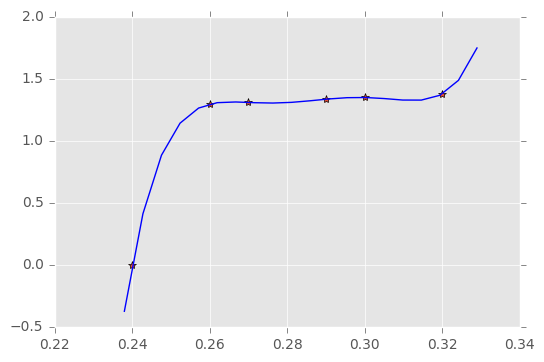

In [77]:
plt.plot(x, y, '*', dis, Polin_func2(dis, koeff=c),'-b')
plt.show

In [78]:
print(abs(np.array(y)) - abs(np.array(Polin_func2(x, koeff=c))))
print(np.sqrt(sum([i - sum(y)/len(y) for i in Polin_func2(x, koeff=c)])/(len(x)*(len(x)-1))))
print(y)
print(Polin_func2(x, koeff=c))

[ -4.54747351e-12   3.15769633e-12   5.32600630e-11   3.70492526e-11
   1.45528034e-12   3.59723362e-11]
nan
[0, 1.297, 1.31, 1.336, 1.35, 1.377]
[-4.547473508864641e-12, 1.2969999999968422, 1.30999999994674, 1.3359999999629508, 1.3499999999985448, 1.3769999999640277]


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [79]:
def Int_EDin_func(znach):
    return int(math.sin(znach / 5) * math.exp(znach / 10) + 5 * math.exp(-znach / 2))

In [80]:
% time res = scipy.optimize.minimize(EDin_func, 2 ) 
print res,'\n',res.x,'\n', res.message,'\n', res.hess_inv 
%time res = scipy.optimize.minimize(EDin_func, 30, method='BFGS' ) 
print res,'\n',res.x,'\n', res.message,'\n', res.hess_inv 
%time res = scipy.optimize.differential_evolution(EDin_func, [(0, 30)])
print res.x, res.fun
%time res = scipy.optimize.minimize(Int_EDin_func, 30, method='BFGS' ) 
print res,'\n',res.x,'\n', res.message,'\n', res.hess_inv

CPU times: user 2.09 ms, sys: 401 µs, total: 2.49 ms
Wall time: 2.08 ms
      fun: 1.7452682903449388
 hess_inv: array([[ 5.98752437]])
      jac: array([ -2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627618]) 
[ 4.13627618] 
Optimization terminated successfully. 
[[ 5.98752437]]
CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 1.42 ms
      fun: -11.898894665981285
 hess_inv: array([[ 1.67932484]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019339]) 
[ 25.88019339] 
Optimization terminated successfully. 
[[ 1.67932484]]
CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 9.58 ms
[ 25.88020104] -11.898894666
CPU times: user 325 µs, sys: 0 ns, total: 325 µs
Wall time: 272 µs
      fun: -5
 hess_inv: array([[1]])
   

In [81]:
koeff

[]

In [82]:
import random
a = []
b = range(10)
for i in range(10):
    a += [random.randint(1, 30)]

In [83]:
print a, len(a), '\n', b, len(b)

[10, 1, 18, 21, 12, 11, 9, 13, 6, 1] 10 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10


In [84]:
c =  koeff_search(b, a)

[  1.00000000e+01   7.81285714e+01  -2.77077778e+02   3.26114881e+02
  -1.84907639e+02   5.85541667e+01  -1.09430556e+01   1.20059524e+00
  -7.15277778e-02   1.78571429e-03]
